### Scooter Demand Predicion

A Scooter sharing scheme is a service in which scooters are made available for shared use to individuals for a short period of time at a cost or for free

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('/Users/Aishwarya/Desktop/data scientist/bike_data.csv')
df

C:\Users\Aishwarya\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Aishwarya\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


* instant：The unique identifier of the record, incrementing from 1 in chronological order.
* dteday：date in the format dd-mm-yyyy.
* season：Season, the value is 1~4, indicating spring, summer, autumn and winter respectively.
* yr：Year, the value is 0 or 1, indicating 2018 and 2019 respectively.
* mnth：Month, the value is 1~12, representing January to December respectively.
* holiday：Whether it is a holiday, the value is 0 or 1.
* weekday：Day of the week, the value is 0~6, representing Sunday to Saturday respectively.
* workingday：Whether it is a working day, the value is 0 or 1, where 1 indicates that the day is a working day.
* weathersit：Weather conditions, value is 1~3
* temp：Celsius Temperature in degrees Celsius.
* atemp：Feeling temperature in degrees Celsius.
* hum：Relative humidity, expressed as a percentage.
* windspeed：Wind speed in kilometers per hour.
* casual：The number of bicycles rented by non-registered users.
* registered：The number of bicycles rented by registered users.
* cnt：The total number of bicycles rented is equal to casual + registered。

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


<AxesSubplot:>

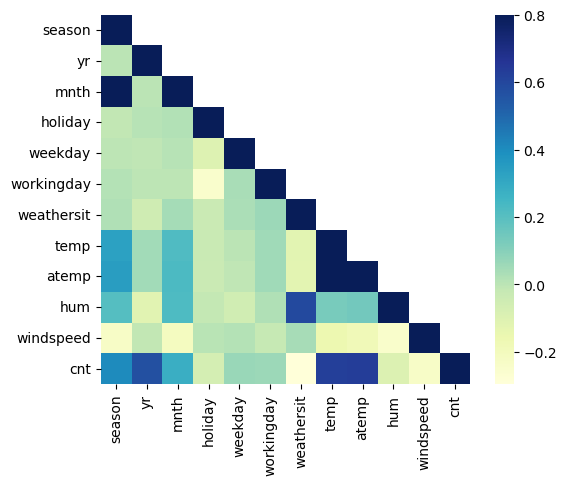

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df.drop(['instant','dteday','casual','registered'], axis=1)  #删除不太重要的字段
varcorr = df.corr()
mask = np.array(varcorr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(varcorr, mask=mask, vmax=0.8, square=True, annot=False,cmap='YlGnBu')

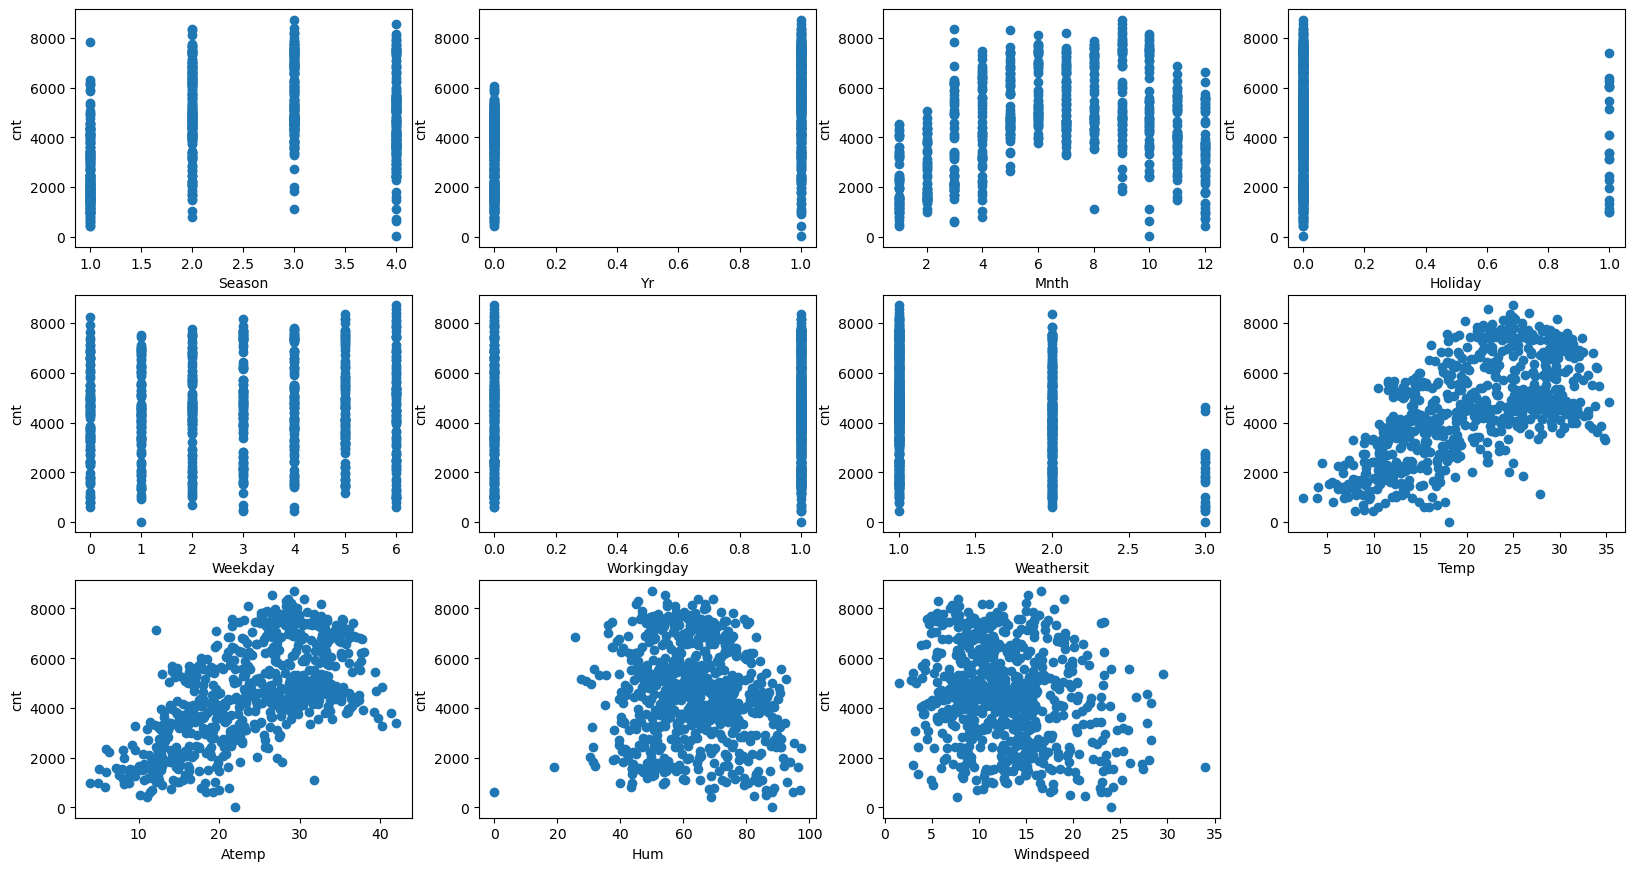

In [5]:
plt.figure(figsize=(20,10.5))
plot_count = 1
for feature in list(df.columns)[:-1]:
    plt.subplot(3,4,plot_count)
    plt.scatter(df[feature],df['cnt'])
    plt.xlabel(feature.replace('_',' ').title())
    plt.ylabel('cnt')
    plot_count += 1
plt.show()

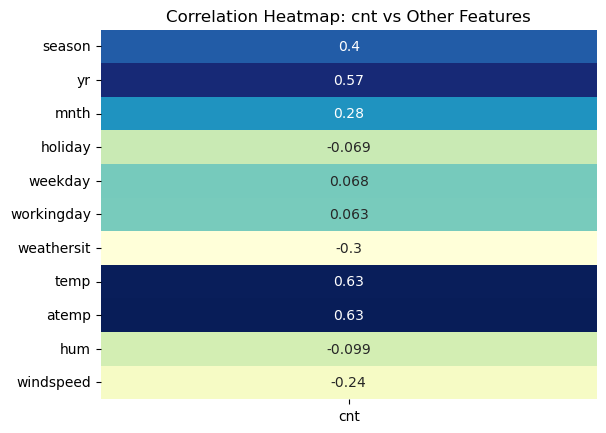

In [6]:
# Keep 'cnt' column
df_cnt = df['cnt']

# Delete 'cnt' column
df_notcnt = df.drop(['cnt'], axis=1)

# Calculate correlation coefficient matrix
correlation_matrix = df_notcnt.corrwith(df_cnt)

# Create a new DataFrame containing only the 'cnt' column and the correlation coefficient
df_corr = pd.DataFrame({'cnt': correlation_matrix})

# Draw heat map
sns.heatmap(df_corr, annot=True, cmap="YlGnBu", cbar=False)

# Set graph title
plt.title("Correlation Heatmap: cnt vs Other Features")

# display graphics
plt.show()

# Linear regression

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(['cnt'], axis=1)  # Select all feature columns except 'cnt'
y = df['cnt']                 # Select target variable column

# Divide the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a linear regression model
model1 = LinearRegression()

# Train the model on the training set
model1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model1.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)  # mean square error
r2 = r2_score(y_test, y_pred)            # R^2 coefficient of determination

# Print model performance indicators
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 762570.6257386529
R² Score: 0.7944864051538519


# Decision tree

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import median_absolute_error
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(['cnt'], axis=1)  # Select all feature columns except 'cnt'
y = df['cnt']                 # Select target variable column

# Define the parameter space to be searched
param_grid = {
    'max_depth': [8,9,10],
    'min_samples_leaf': [5,6,7,8]
}


# Divide training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a regression tree model
model2 = DecisionTreeRegressor(random_state=42)

# Define cross-validation grid search objects
grid_search = GridSearchCV(
    estimator=model2,
    param_grid=param_grid,
    cv=10,  # 10 fold cross validation
    scoring='neg_mean_squared_error'  # The evaluation index is negative mean square error mse
)

# Fit the model on the training set and perform parameter search
grid_search.fit(X_train, y_train)

# Output optimal model parameters and scores
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', -grid_search.best_score_)

Best Parameters: {'max_depth': 9, 'min_samples_leaf': 7}
Best Score: 722405.6004917726


In [9]:
# Fit the model on the training set and perform parameter search
grid_search.fit(X_train, y_train)

# Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Calculate mse and r2 scores
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print('Mean Squared Error (MSE):', mse)
print('R² Score:', r2)

Mean Squared Error (MSE): 547840.7839733871
R² Score: 0.8523563259355219


# randomforest

In [10]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop(['cnt'], axis=1)  # Select all feature columns except 'cnt'
y = df['cnt']                 # Select target variable column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a random forest regression model
model3 = RandomForestRegressor(n_estimators=50, random_state=42)
 
# Training model
model3.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# predict
y_pred = model3.predict(X_test)

# Calculate mse and r2 scores
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print('Mean Squared Error (MSE):', mse)
print('R² Score:', r2)

Mean Squared Error (MSE): 383567.46266484016
R² Score: 0.8966281607793232


# SVR

In [12]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Prepare data
X = df.drop(['cnt'], axis=1)  # Select all feature columns except 'cnt'
y = df['cnt']                 # Select target variable column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Data normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define SVR model
model4 = SVR()

# Define parameter grid
param_grid = {
    'kernel': ['rbf', 'linear'],
    'C': [100,105,110],
    'gamma': [0.01, 0.1, 1],
    'epsilon': [0.01,0.1,1]
}

# grid search
grid_search = GridSearchCV(model4, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Output the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Predict on the test set
y_pred = grid_search.predict(X_test_scaled)

# Calculate mse and r2 scores
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print('Mean Squared Error (MSE):', mse)
print('R² Score:', r2)

Best Parameters:  {'C': 105, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Best Score:  0.7811775438718728
Mean Squared Error (MSE): 732158.5937886523
R² Score: 0.8026824801161763
